## Implementing Logical AND Function Using Hebbian Neural Network


### 1) Initializing Project and Reading Data From CSV Files 
In order to implement AND function, we need some libraries and packages:

- **numpy**: we use this library to calculate complex matrix operation
- **matplotlib**: this is a plotting library, here we use it in plotting **classification graph** and **test case accuracy graph** 
- **hebb_and_function**: this is implementation of **AND gate using Hebbian Network** implemented in **src** folder


We are using 2 datasets for each functions (AND, OR): \
First one is our training dataset which includes **2 inputs**, **bias** and **target** value. **(training_dataset.csv)** \
Second on is for testing if our training proccess was successful or not. **(test_dataset.csv)**. \
All datasets exists in the **dataset** folder with CSV format. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from projects import TwoInputHebbNetwork


and_training_dataset = np.genfromtxt("../dataset/and/training_dataset.csv", delimiter=',', skip_header=1)
and_test_dataset = np.genfromtxt("../dataset/and/test_dataset.csv", delimiter=',', skip_header=1)

or_training_dataset = np.genfromtxt("../dataset/or/training_dataset.csv", delimiter=',', skip_header=1)
or_test_dataset = np.genfromtxt("../dataset/or/test_dataset.csv", delimiter=',', skip_header=1)

numpy's genfromtxt() function expects three arguments and returns a numpy array: 
- **fname**: patch to our dataset.
- **delimeter**: delimeter which is used to separate values.
- **skip_header**: the number of lines to skip at the beginning of a file (we use it to ommiting the x1, x2, bias and target labels).

### 2) Train The Networks
Here we train our two networks using train() function implemented in **two_input_hebb.py** in **src/projects**


In [2]:
and_hebb_network = TwoInputHebbNetwork()
or_hebb_network = TwoInputHebbNetwork()

for vector in and_training_dataset:
    and_hebb_network.train(vector[0], vector[1], vector[2], vector[3])

for vector in or_training_dataset:
    or_hebb_network.train(vector[0], vector[1], vector[2], vector[3])

### 3. Plotting Decision Regions and Classifaction Results
#### a) AND Function
In this part we have correct weights for our network \
All we need is line that separate decision regions. \
This line is x2 = b + w1x1 / -w2x2 for 2 inputs.

For example we want to plot a line in range of (-2, 3) for X1 axes. \
If we give [-2 and 3] to our line, we get [3 and -2] for x2 axes.

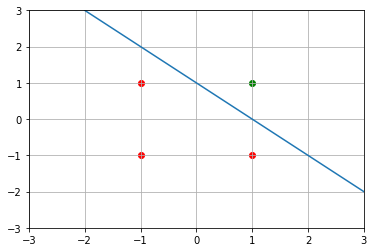

In [3]:
x1 = np.array([-2, 3]) # x1=[-2, 3]
x2 = (and_hebb_network.bias + and_hebb_network.w1 * x1) / (- and_hebb_network.w2) # x2 = b + w1x1 / -w2x2, at the end will be x2=[3, -2]

plt.plot(x1, x2)
for vector in and_training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negetive area (red points)
    if vector[3] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

#### b) OR Function

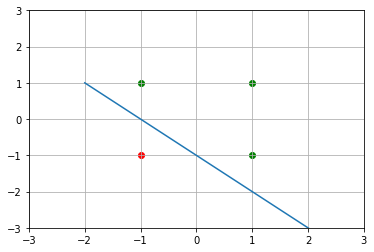

In [4]:
x1 = np.array([-2, 3]) # x1=[-2, 3]
x2 = (or_hebb_network.bias + or_hebb_network.w1 * x1) / (- or_hebb_network.w2) # x2 = b + w1x1 / -w2x2, at the end will be x2=[3, -2]

plt.plot(x1, x2)
for vector in or_training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negetive area (red points)
    if vector[3] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### 4. Plotting The Accuracy Chart
#### a) AND Function
Here we plot a bar chart to indicate our accuaracy ratio, by counting number of cases which successfully produces the desired target value.

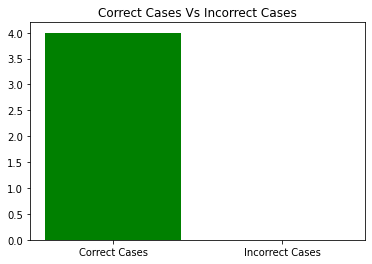

In [5]:
correct_cases = 0
for test_vector in and_test_dataset:
    net_input = and_hebb_network.calculate_net_input(test_vector[0], test_vector[1])
    result = and_hebb_network.activation_function(net_input)
    if result == test_vector[2]:
        correct_cases += 1
incorrect_cases = and_test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'))
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()

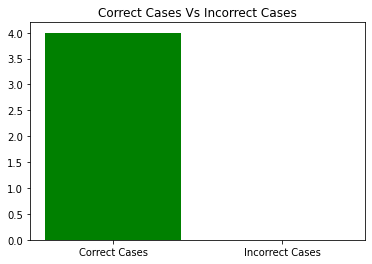

In [6]:
correct_cases = 0
for test_vector in or_test_dataset:
    net_input = or_hebb_network.calculate_net_input(test_vector[0], test_vector[1])
    result = or_hebb_network.activation_function(net_input)
    if result == test_vector[2]:
        correct_cases += 1
incorrect_cases = or_test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'))
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()